# Test Lotka-Voltera simulator

In [1]:
import numpy as np
import corner
from matplotlib import pyplot as plt
%matplotlib inline
import logging

from goldmine.simulators.lotka_volterra import LotkaVolterra

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')
logging.getLogger().setLevel(logging.DEBUG)

## Run simulation

In [2]:
simulator = LotkaVolterra()

In [3]:
theta0 = simulator.theta_defaults(single_theta=True)[0][0]
print(theta0)
theta1 = np.log(np.array([0.015, 0.7, 1., 0.01]))
print(theta1)

[-4.60517019 -0.69314718  0.         -4.60517019]
[-4.19970508 -0.35667494  0.         -4.60517019]


In [4]:
x0, log_r_xz0, t_xz0, histories0 = simulator.rvs_ratio_score(theta0, theta0, theta1, theta0, 100, return_histories=True)
x1, log_r_xz1, histories1 = simulator.rvs_ratio(theta0, theta0, theta1, 100, return_histories=True)
x2, t_xz2, histories2 = simulator.rvs_score(theta0, theta0, 100, return_histories=True)


17:44  Simulating 100 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.60517019 -0.69314718  0.         -4.60517019] and [-4.19970508 -0.35667494  0.         -4.60517019] and joint score at  [-4.60517019 -0.69314718  0.         -4.60517019]
17:44    Starting sample 1 of 100
17:44    Starting sample 2 of 100
17:44    Starting sample 3 of 100
17:44    Starting sample 4 of 100
17:44    Starting sample 5 of 100
17:44    Starting sample 6 of 100
17:44    Starting sample 7 of 100
17:44    Starting sample 8 of 100
17:44    Starting sample 9 of 100
17:45    Starting sample 10 of 100
17:45    Starting sample 11 of 100
17:45    Starting sample 12 of 100
17:45    Starting sample 13 of 100
17:45    Starting sample 14 of 100
17:45    Starting sample 15 of 100
17:45    Starting sample 16 of 100
17:45    Starting sample 17 of 100
17:45    Starting sample 18 of 100
17:45    Starting sample 19 of 100
17:45    Starting sample 20 of 100
17:

17:53    Starting sample 55 of 100
17:53    Starting sample 56 of 100
17:53    Starting sample 57 of 100
17:53    Starting sample 58 of 100
17:53    Starting sample 59 of 100
17:53    Starting sample 60 of 100
17:53    Starting sample 61 of 100
17:53    Starting sample 62 of 100
17:53    Starting sample 63 of 100
17:53    Starting sample 64 of 100
17:53    Starting sample 65 of 100
17:53    Starting sample 66 of 100
17:53    Starting sample 67 of 100
17:53    Starting sample 68 of 100
17:53    Starting sample 69 of 100
17:53    Starting sample 70 of 100
17:53    Starting sample 71 of 100
17:53    Starting sample 72 of 100
17:53    Starting sample 73 of 100
17:53    Starting sample 74 of 100
17:53    Starting sample 75 of 100
17:53    Starting sample 76 of 100
17:53    Starting sample 77 of 100
17:53    Starting sample 78 of 100
17:53    Starting sample 79 of 100
17:53    Starting sample 80 of 100
17:53    Starting sample 81 of 100
17:53    Starting sample 82 of 100
17:53    Starting sa

## Plot predator and prey evolutions

In [9]:
t = np.linspace(0., 30., histories0[0].shape[0])
                
mean_histories0 = np.median(np.array(histories0), axis=0)
mean_histories1 = np.median(np.array(histories1), axis=0)
mean_histories2 = np.median(np.array(histories2), axis=0)

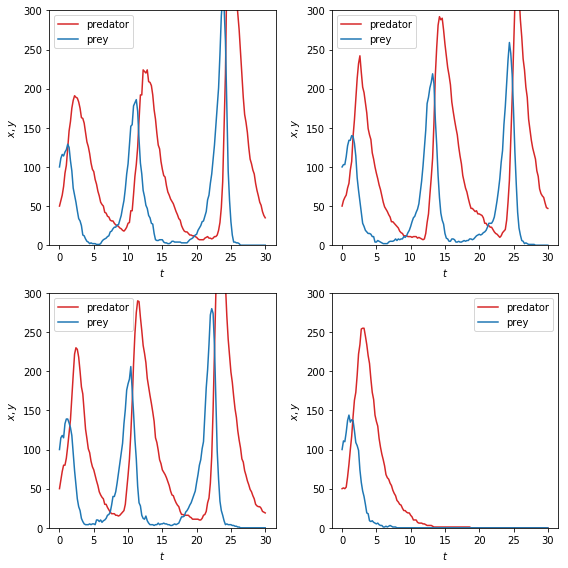

In [6]:
fig = plt.figure(figsize=(8,8))

for i in range(4):

    ax = plt.subplot(2,2,i+1)

    plt.plot(t, histories0[i][:,0], c='C3', lw=1.5, ls='-', label='predator')
    plt.plot(t, histories0[i][:,1], c='C0', lw=1.5, ls='-', label='prey')

    plt.legend()

    plt.xlabel(r'$t$')
    plt.ylabel(r'$x, y$')
    plt.ylim(0,300)

plt.tight_layout()
plt.show()

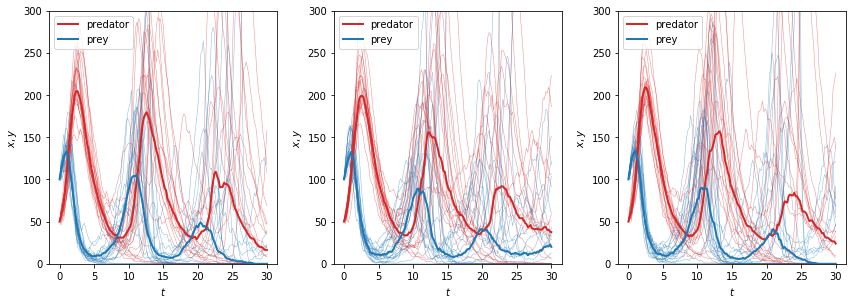

In [11]:
fig = plt.figure(figsize=(12,8))

for panel, (histories, mean_history) in enumerate(zip([histories0, histories1, histories2],
                                                    [mean_histories0, mean_histories1, mean_histories2])):

    ax = plt.subplot(2,3,panel+1)

    for history in histories[:20]:
        plt.plot(t, history[:,0], c='C3', alpha=0.5, lw=0.5, ls='-')
        plt.plot(t, history[:,1], c='C0', alpha=0.5, lw=0.5, ls='-')
    plt.plot(t, mean_history[:,0], c='C3', lw=2., ls='-', label='predator')
    plt.plot(t, mean_history[:,1], c='C0', lw=2., ls='-', label='prey')

    plt.legend()

    plt.xlabel(r'$t$')
    plt.ylabel(r'$x, y$')
    plt.ylim(0,300)

plt.tight_layout()
plt.show()

## Summary statistics

18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too few points to create valid contours
18:10  Too fe

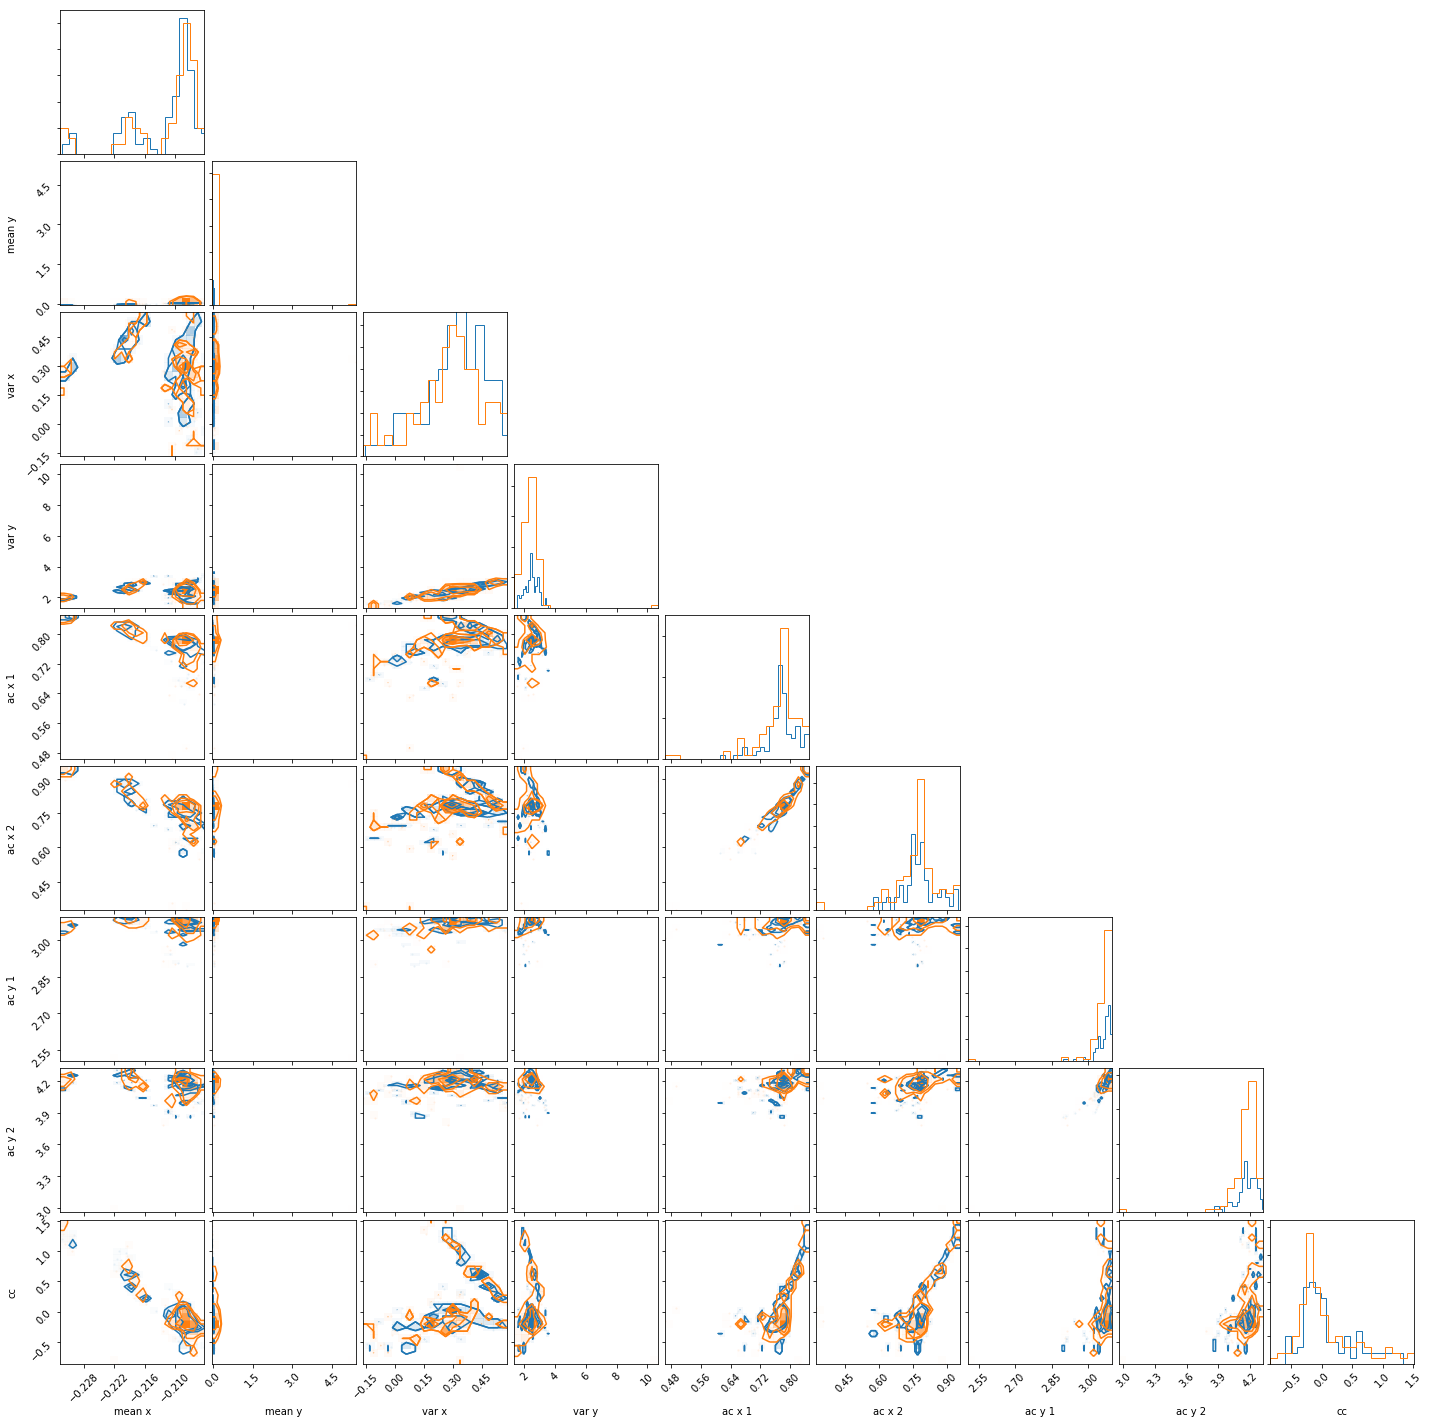

In [14]:
import corner

labels = [r'mean x', r'mean y', r'var x', r'var y', r'ac x 1', r'ac x 2', r'ac y 1', r'ac y 2', 'cc']
ranges = [(-5.,5) for _ in range(9)]

fig = corner.corner(x0, color='C0', labels=labels, ranges=ranges)
_ = corner.corner(x1, color='C1', labels=labels, fig=fig, ranges=ranges)

<function matplotlib.pyplot.plot>

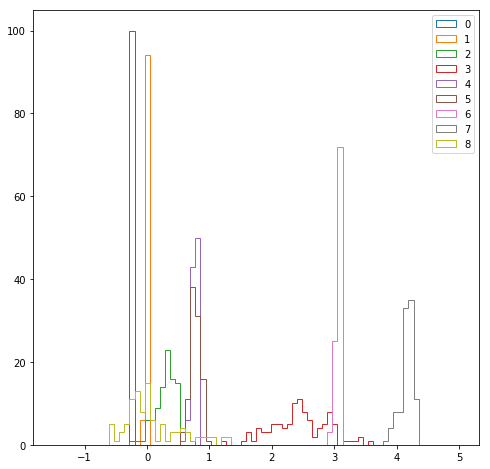

In [18]:
plt.figure(figsize=(8,8))

for i in range(9):
    plt.hist(x0[:,i], range=(-1.5,5.), bins=80, histtype='step', label=str(i))
    
plt.legend()
    
plt.plot